# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Visualise

In [2]:
def plot_classes(X, y):
    y = y.reshape(-1)
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(class_0[:, 0], class_0[:, 1], c='orange', marker='o', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='s', label='Class 1')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Class Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()


# Part 1

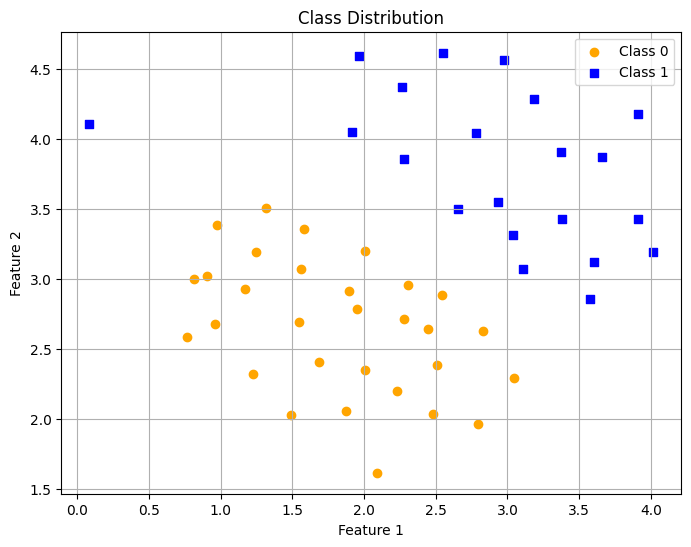

In [3]:
mat=loadmat('./Dataset/data1.mat')

X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

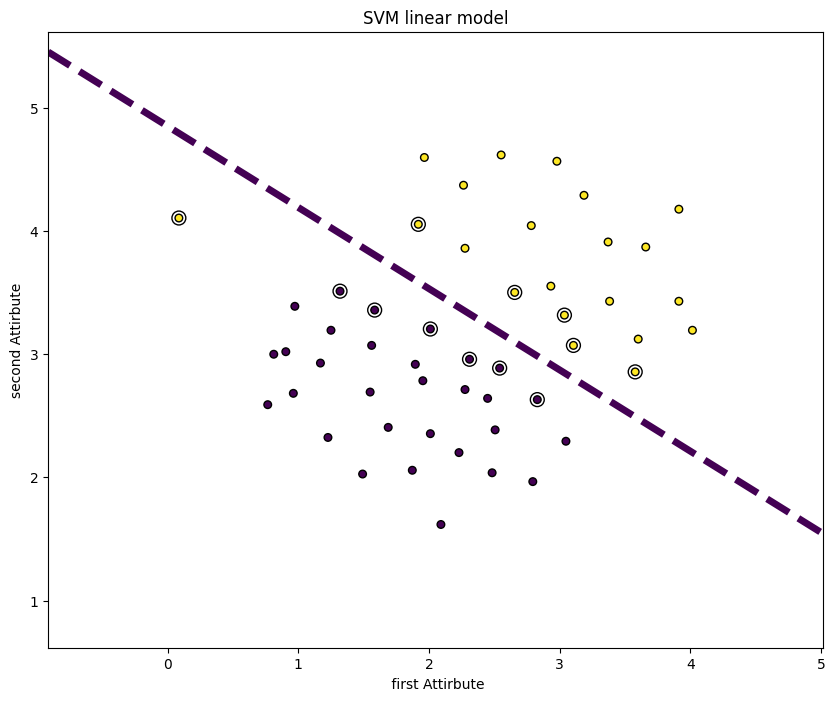

In [10]:
model = SVC(kernel='linear', C=1.0)
model.fit(X, y.ravel())

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], linewidths=5, linestyles='--')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=30, cmap='viridis')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.title("SVM linear model")
plt.xlabel(" first Attirbute")
plt.ylabel("second Attirbute")
plt.show()

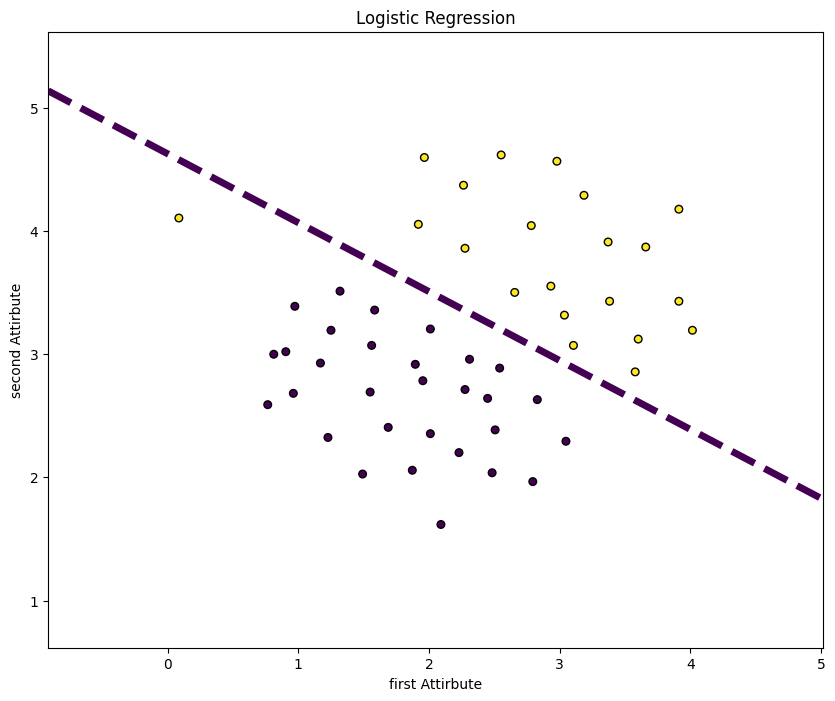

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X, y.ravel())

Z_lr = log_reg.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contour(xx, yy, Z_lr, levels=[0], linewidths=5, linestyles='--')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=30, cmap='viridis')
plt.title("Logistic Regression")
plt.xlabel("first Attirbute")
plt.ylabel("second Attirbute")
plt.show()

# Part 2

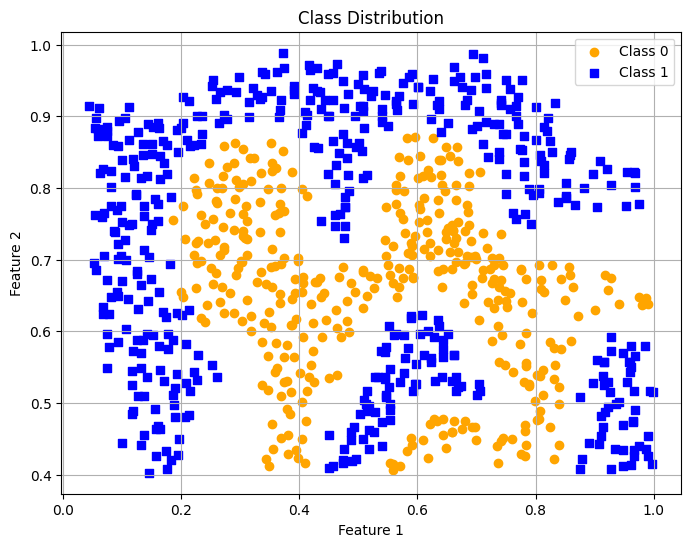

In [12]:
mat=loadmat('./Dataset/data2.mat')

X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

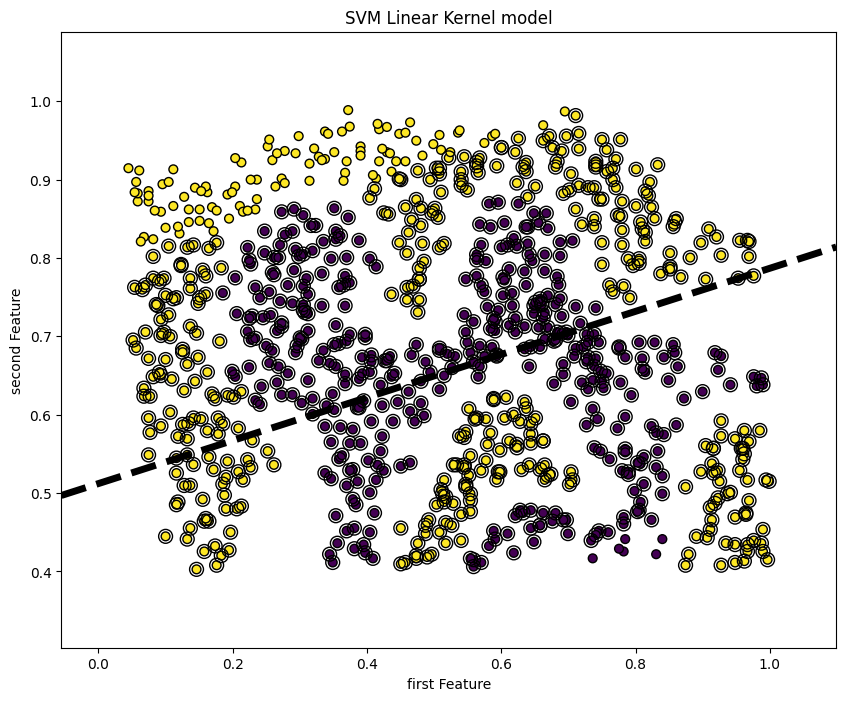

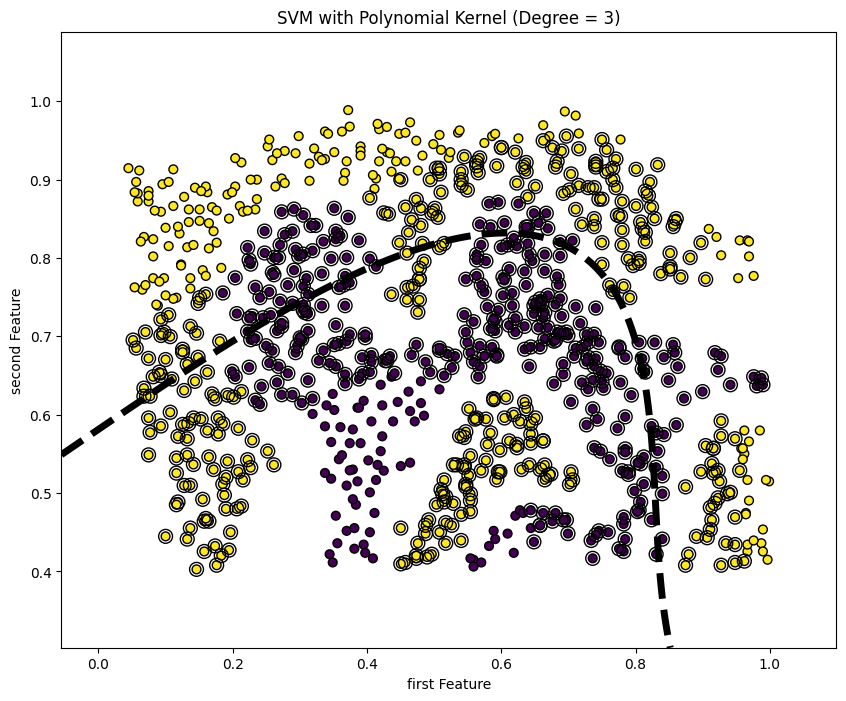

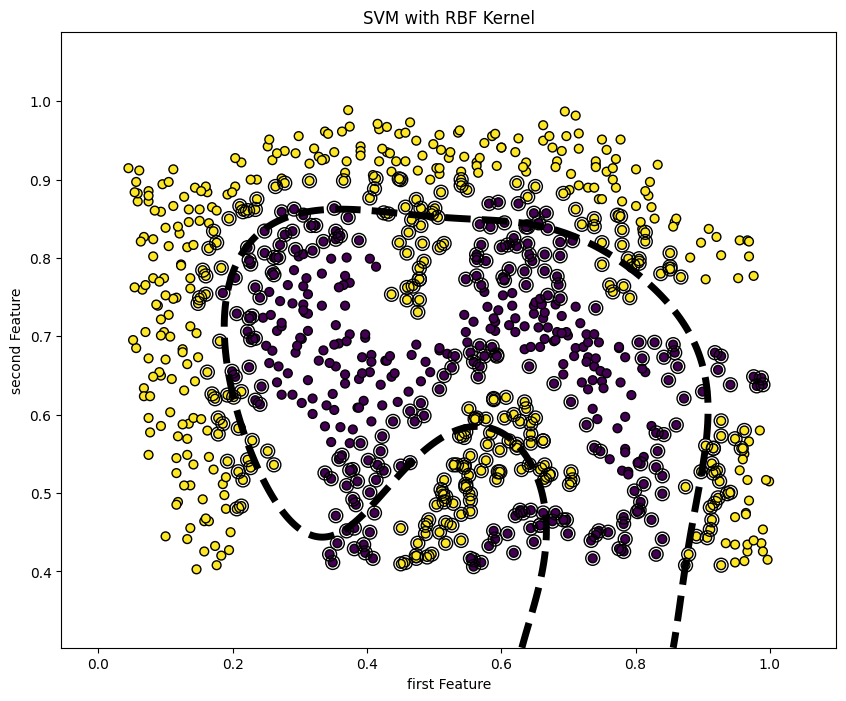

In [15]:
margin = 0.1
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

def plot_decision_boundary(model, title="Decision Boundary"):
    plt.figure(figsize=(10, 8))  
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--', linewidths=5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis', edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(title)
    plt.xlabel("first Feature")
    plt.ylabel("second Feature")
    plt.show()
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X, y.ravel())
plot_decision_boundary(svm_linear, "SVM Linear Kernel model")
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X, y.ravel())
plot_decision_boundary(svm_poly, "SVM with Polynomial Kernel (Degree = 3)")
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X, y.ravel())
plot_decision_boundary(svm_rbf, "SVM with RBF Kernel")

# Part 3

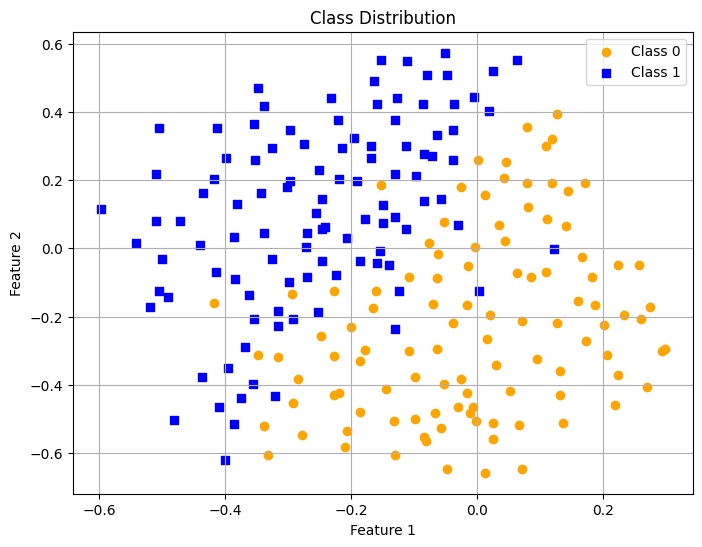

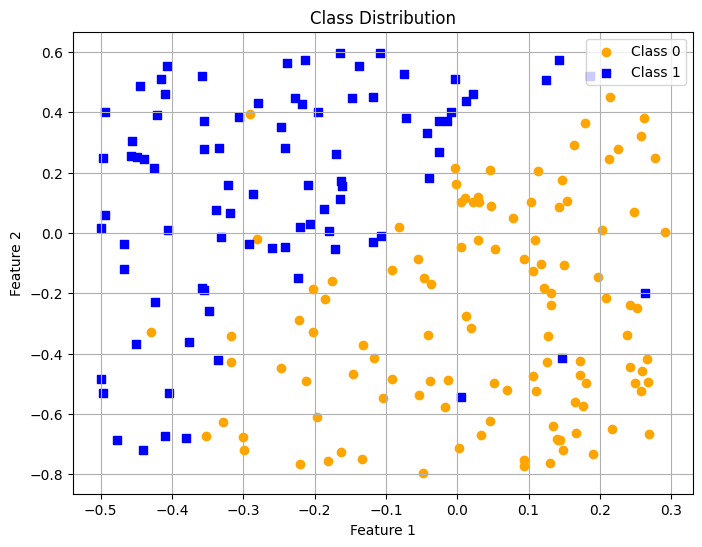

In [19]:
mat=loadmat('./Dataset/data3.mat')

X=mat['X']
y=mat['y'].astype(int)

Xval=mat['Xval']
yval=mat['yval'].astype(int)
plot_classes(X,y)
plot_classes(Xval,yval)

In [22]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
degrees = [2, 3, 4, 5]

best_model = None
best_score = 0.0
best_params = {}
for C in Cs:
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    val_predictions = model.predict(Xval)
    val_accuracy = accuracy_score(yval, val_predictions)

    if val_accuracy > best_score:
        best_score = val_accuracy
        best_model = model
        best_params = {'kernel': 'linear', 'C': C}
for C in Cs:
    for d in degrees:
        model = SVC(kernel='poly', degree=d, C=C)
        model.fit(X, y)
        val_predictions = model.predict(Xval)
        val_accuracy = accuracy_score(yval, val_predictions)

        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'kernel': 'poly', 'C': C, 'degree': d}
for C in Cs:
    for g in gammas:
        model = SVC(kernel='rbf', C=C, gamma=g)
        model.fit(X, y)
        val_predictions = model.predict(Xval)
        val_accuracy = accuracy_score(yval, val_predictions)

        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'kernel': 'rbf','gamma': g, 'C': C}

print("best validation accuracy is = {:.3f}".format(best_score*100))
print("best Model Parameters are:", best_params)

best validation accuracy is = 96.500
best Model Parameters are: {'kernel': 'rbf', 'gamma': 30, 'C': 3}


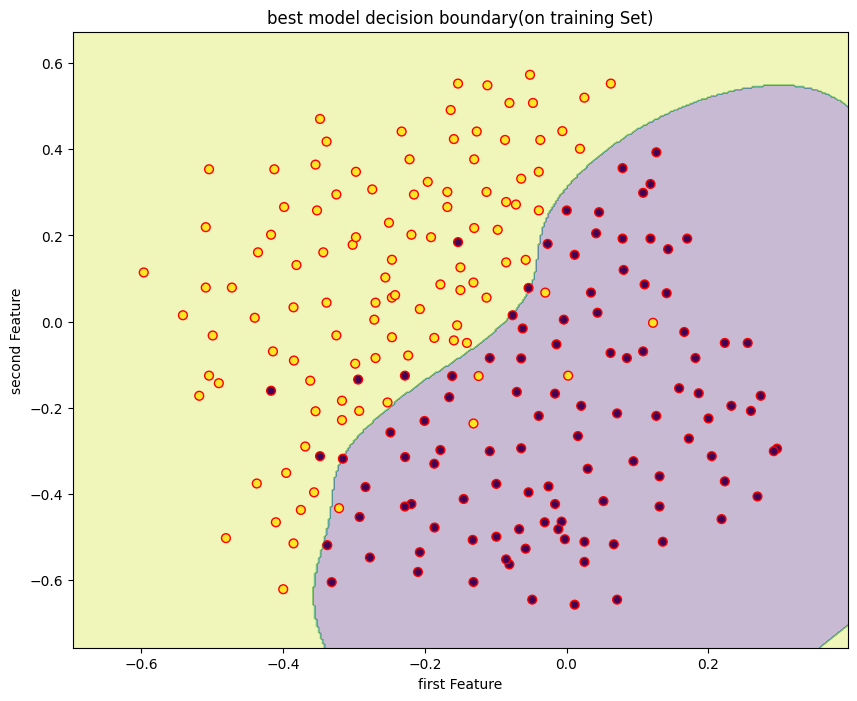

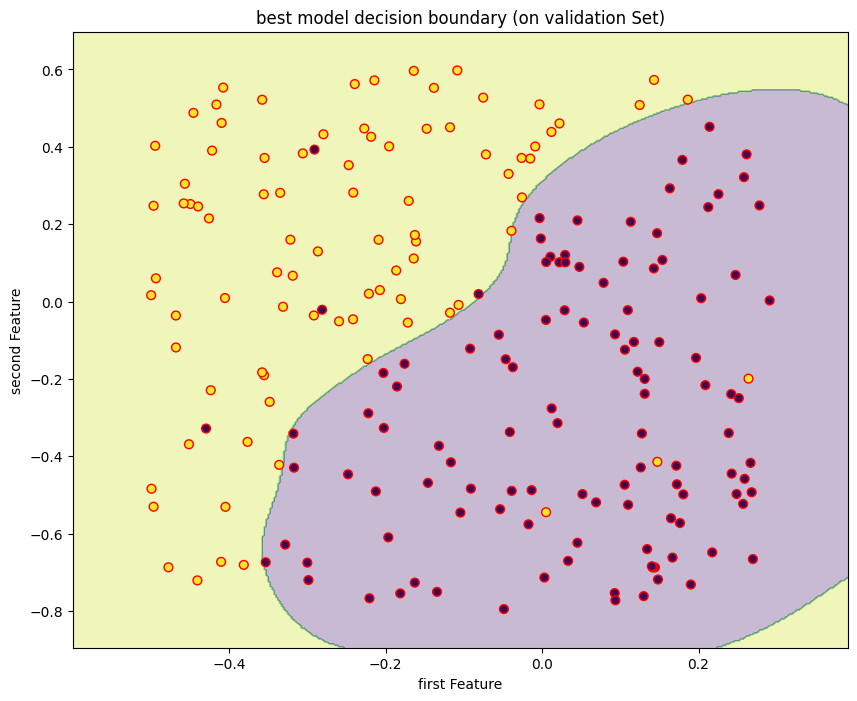

In [26]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    margin = 0.1
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40,  edgecolors='r')

    plt.title(title)
    plt.xlabel("first Feature")
    plt.ylabel("second Feature")
    plt.show()

plot_decision_boundary(best_model, X, y, title="best model decision boundary(on training Set)")
plot_decision_boundary(best_model, Xval, yval, title="best model decision boundary (on validation Set)")

training sets: 56000
test sets: 14000
PCA for visualization


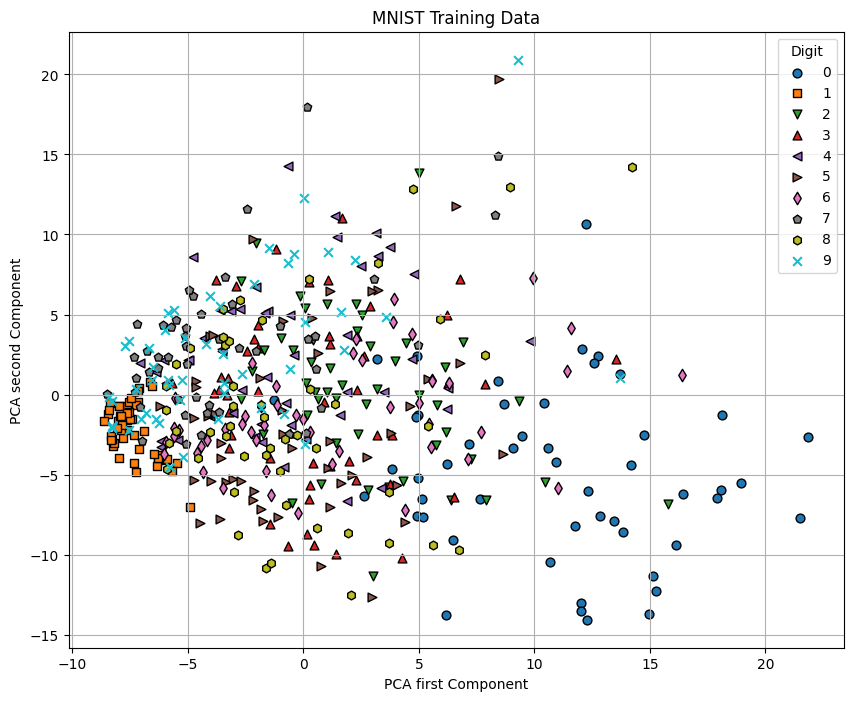

Training One-vs-One SVM model
OvO model trained.
Training One-vs-All model
OvA model trained.
Training Crammer-Singer SVM model...
Crammer-Singer model trained.
Evaluating models on test data...
=== Evaluation for One-vs-One (OvO) ===
Accuracy: 0.2374
F1 Score: 0.1898
Precision: 0.8043
Recall: 0.2258
Confusion Matrix:
[[  39    0 1304    0    0    0    0    0    0    0]
 [   0 1277  320    3    0    0    0    0    0    0]
 [   0    0 1380    0    0    0    0    0    0    0]
 [   0    0 1201  232    0    0    0    0    0    0]
 [   0    0 1291    0    4    0    0    0    0    0]
 [   0    0 1266    6    0    1    0    0    0    0]
 [   0    0 1377    0    0    0   19    0    0    0]
 [   0    0 1231    0    0    0    0  272    0    0]
 [   0    0 1354    3    0    0    0    0    0    0]
 [   0    0 1314    4    0    0    0    2    0  100]]


=== Evaluation for One-vs-All (OvA) ===
Accuracy: 0.3197
F1 Score: 0.3026
Precision: 0.8934
Recall: 0.3058
Confusion Matrix:
[[ 150    0 1193    0 

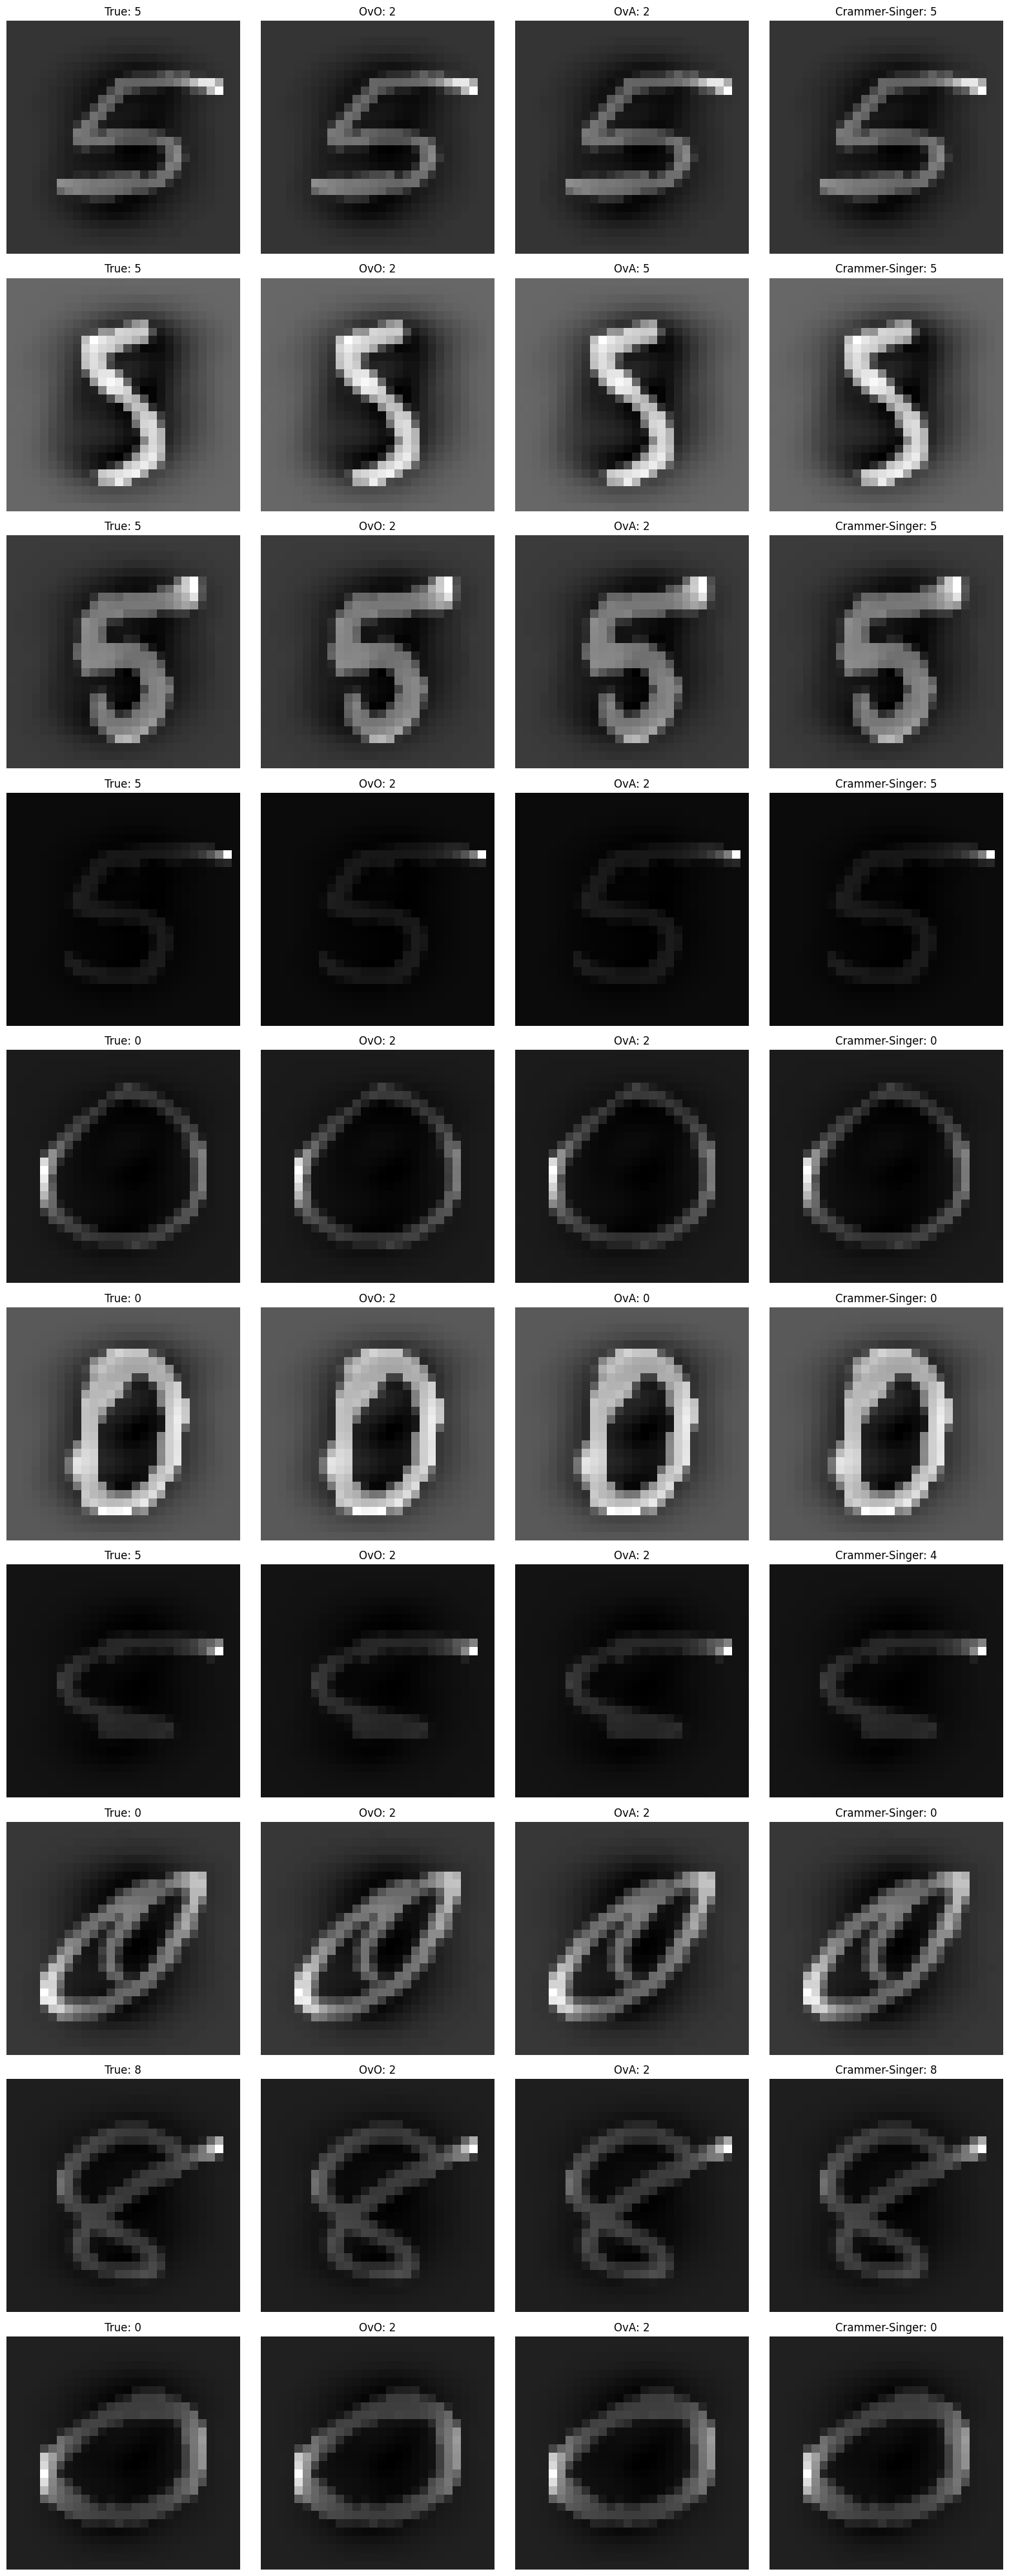

In [27]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("training sets:", X_train.shape[0])
print("test sets:", X_test.shape[0])

print("PCA for visualization")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

def plot_mnist_2d(X_pca, y, title="MNIST PCA Visualization"):
    plt.figure(figsize=(10,8))
    markers = ['o', 's', 'v', '^', '<', '>', 'd', 'p', 'h', 'x']
    colors = plt.cm.get_cmap('tab10', 10)
    for digit in range(10):
        idx = np.where(y == digit)[0]
        sample_idx = np.random.choice(idx, size=min(50, len(idx)), replace=False)
        plt.scatter(X_pca[sample_idx, 0], X_pca[sample_idx, 1], 
                    label=str(digit), marker=markers[digit % len(markers)], 
                    color=colors(digit), edgecolor='k', s=40)
    plt.legend(title="Digit")
    plt.title(title)
    plt.xlabel("PCA first Component")
    plt.ylabel("PCA second Component")
    plt.grid(True)
    plt.show()

plot_mnist_2d(X_train_pca, y_train, title="MNIST Training Data")

subset = 8000
X_train = X_train[:subset]
y_train = y_train[:subset]
print("Training One-vs-One SVM model")
model_ovo = SVC(kernel='rbf', C=5, gamma=0.05) 
model_ovo.fit(X_train, y_train)
print("OvO model trained.")
print("Training One-vs-All model")

class SVM_OVA:
    def __init__(self, kernel='rbf', C=5, gamma=0.05):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.classifiers = {}
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            y_binary = np.where(y == cls, 1, -1)
            clf = SVC(kernel=self.kernel, C=self.C, gamma=self.gamma,
                      class_weight='balanced', probability=False)
            clf.fit(X, y_binary)
            self.classifiers[cls] = clf
    
    def predict(self, X):
        scores = np.zeros((X.shape[0], len(self.classes_)))
        for i, cls in enumerate(self.classes_):
            scores[:, i] = self.classifiers[cls].decision_function(X)
        return self.classes_[np.argmax(scores, axis=1)]
    
    def decision_function(self, X):
        scores = np.zeros((X.shape[0], len(self.classes_)))
        for i, cls in enumerate(self.classes_):
            scores[:, i] = self.classifiers[cls].decision_function(X)
        return scores

model_ova = SVM_OVA(kernel='rbf', C=5, gamma=0.05)
model_ova.fit(X_train, y_train)
print("OvA model trained.")
print("Training Crammer-Singer SVM model...")
model_cs = LinearSVC(multi_class='crammer_singer', C=5, max_iter=10000)
model_cs.fit(X_train, y_train)
print("Crammer-Singer model trained.")
def evaluate_model(model, X, y, model_name="Model"):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    conf_mat = confusion_matrix(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    prec = precision_score(y, y_pred, average='macro')
    rec = recall_score(y, y_pred, average='macro')
    print(f"=== Evaluation for {model_name} ===")
    print("Accuracy: {:.4f}".format(acc))
    print("F1 Score: {:.4f}".format(f1))
    print("Precision: {:.4f}".format(prec))
    print("Recall: {:.4f}".format(rec))
    print("Confusion Matrix:")
    print(conf_mat)
    print("\n")
    return y_pred

print("Evaluating models on test data...")
pred_ovo = evaluate_model(model_ovo, X_test, y_test, "One-vs-One (OvO)")
pred_ova = evaluate_model(model_ova, X_test, y_test, "One-vs-All (OvA)")
pred_cs  = evaluate_model(model_cs,  X_test, y_test, "Crammer-Singer (LinearSVC)")
def display_samples(X_test, y_test, preds_list, model_names, sample_count=10):
    indices = np.random.choice(len(X_test), sample_count, replace=False)
    
    num_models = len(model_names)
    
    plt.figure(figsize=(4*(num_models+1), 4*sample_count))
    
    for i, idx in enumerate(indices):
        image = X_test[idx].reshape(28, 28)
        plt.subplot(sample_count, num_models + 1, i*(num_models+1) + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {y_test[idx]}")
        plt.axis('off')
        for j, (pred, name) in enumerate(zip(preds_list, model_names)):
            plt.subplot(sample_count, num_models + 1, i*(num_models+1) + 2 + j)
            plt.imshow(image, cmap='gray')
            plt.title(f"{name}: {pred[idx]}")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("Displaying random test samples with predictions...")
display_samples(X_test, y_test, [pred_ovo, pred_ova, pred_cs],
                ["OvO", "OvA", "Crammer-Singer"])
